# 사용 패키지

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [49]:
import torch.nn as nn
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
import argparse
import easydict
from torch import autograd

In [50]:
from torch.utils import data
from torchvision import datasets, transforms
import os

# 데이터 로드

In [51]:
total = pd.read_csv('./data/한국가스공사_시간별 공급량_20181231.csv', encoding='cp949')

In [53]:
total.head()

,연월일,시간,구분,공급량
0,2013-01-01,1,A,2497.129
1,2013-01-01,2,A,2363.265
2,2013-01-01,3,A,2258.505
3,2013-01-01,4,A,2243.969
4,2013-01-01,5,A,2344.105


In [54]:
print(total.shape)

(368088, 4)


In [55]:
total.isnull().sum()

연월일    0
시간     0
구분     0
공급량    0
dtype: int64

# 전처리

In [59]:
total['구분'].unique()

array(['A', 'B', 'C', 'D', 'E', 'G', 'H'], dtype=object)

In [60]:
d_map = {}
for i, d in enumerate(total['구분'].unique()):
    d_map[d] = i
total['구분'] = total['구분'].map(d_map) # 이 과정은 A~H 까지의 알파벳을 숫자로 매핑(대치)시키는 과정

In [61]:
total['구분']

0         0
1         0
2         0
3         0
4         0
         ..
368083    6
368084    6
368085    6
368086    6
368087    6
Name: 구분, Length: 368088, dtype: int64

In [62]:
d_map

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'G': 5, 'H': 6}

In [63]:
total['연월일'] = pd.to_datetime(total['연월일']) # 시계열 데이터로

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "/USER/d2coding.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

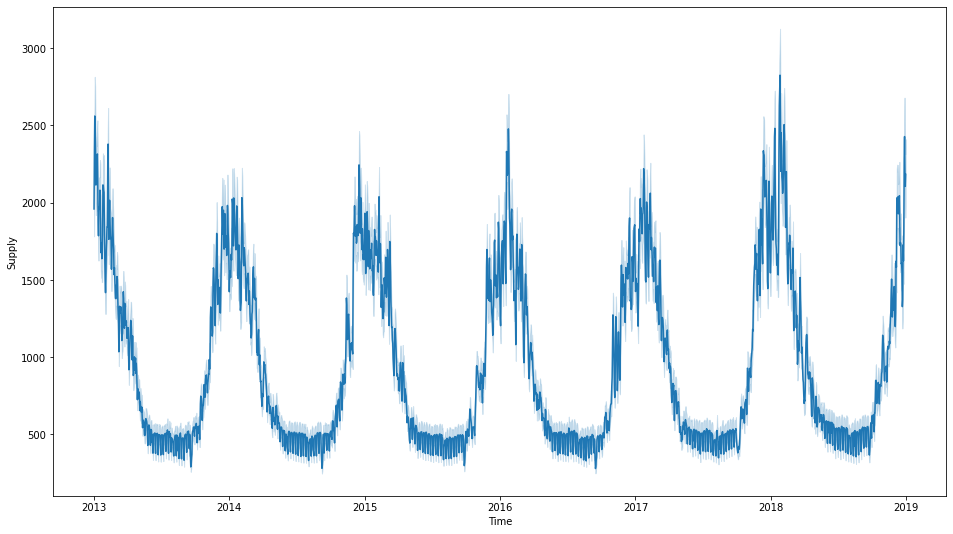

In [65]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=total['공급량'], x=total['연월일'])
plt.xlabel('Time')
plt.ylabel('Supply')
plt.show()

In [ ]:
# 이를 통해 매 겨울 시기에 공급량이 많았다는 것을 알 수 있다. 

In [42]:
# total['year'] = total['연월일'].dt.year
# total['month'] = total['연월일'].dt.month
# total['day'] = total['연월일'].dt.day
# total['weekday'] = total['연월일'].dt.weekday

In [45]:
total

,연월일,시간,구분,공급량,year,month,day,weekday
0,2013-01-01,1,0,2497.129,2013,1,1,1
1,2013-01-01,2,0,2363.265,2013,1,1,1
2,2013-01-01,3,0,2258.505,2013,1,1,1
3,2013-01-01,4,0,2243.969,2013,1,1,1
4,2013-01-01,5,0,2344.105,2013,1,1,1
...,...,...,...,...,...,...,...,...
368083,2018-12-31,20,6,681.033,2018,12,31,0
368084,2018-12-31,21,6,669.961,2018,12,31,0
368085,2018-12-31,22,6,657.941,2018,12,31,0
368086,2018-12-31,23,6,610.953,2018,12,31,0


In [47]:
total.drop(columns='연월일', inplace=True)
print(total)

        시간  구분       공급량  year  month  day  weekday
0        1   0  2497.129  2013      1    1        1
1        2   0  2363.265  2013      1    1        1
2        3   0  2258.505  2013      1    1        1
3        4   0  2243.969  2013      1    1        1
4        5   0  2344.105  2013      1    1        1
...     ..  ..       ...   ...    ...  ...      ...
368083  20   6   681.033  2018     12   31        0
368084  21   6   669.961  2018     12   31        0
368085  22   6   657.941  2018     12   31        0
368086  23   6   610.953  2018     12   31        0
368087  24   6   560.896  2018     12   31        0

[368088 rows x 7 columns]


In [12]:
train_years = [2013,2014,2015,2016,2017]
val_years = [2018]

In [13]:
train = total[total['year'].isin(train_years)]
val = total[total['year'].isin(val_years)]

In [44]:
features = ['구분', 'month', 'day', 'weekday', '시간']
train_x = train[features]
train_y = train['공급량']

val_x = val[features]
val_y = val['공급량']

NameError: name 'train' is not defined

# 학습

In [19]:
d_train = lgb.Dataset(train_x, train_y)
d_val = lgb.Dataset(val_x, val_y)

params = {
    'objective': 'regression',
    'metric':'mae',
    'seed':42
}

model = lgb.train(params, d_train, 500, d_val, verbose_eval=20, early_stopping_rounds=50)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.595481 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 306768, number of used features: 5
[LightGBM] [Info] Start training from score 934.864036
Training until validation scores don't improve for 50 rounds
[20]	valid_0's l1: 244.857
[40]	valid_0's l1: 174.855
[60]	valid_0's l1: 158.739
[80]	valid_0's l1: 153.323
[100]	valid_0's l1: 150.948
[120]	valid_0's l1: 150.463
[140]	valid_0's l1: 148.921
[160]	valid_0's l1: 148.246
[180]	valid_0's l1: 147.586
[200]	valid_0's l1: 147.191
[220]	valid_0's l1: 147.17
[240]	valid_0's l1: 146.954
[260]	valid_0's l1: 146.859
[280]	valid_0's l1: 146.423
[300]	valid_0's l1: 146.176
[320]	valid_0's l1: 146.073
[340]	valid_0's l1: 146.57
[360]	valid_0's l1: 146.426
Early stopping, best iteration is:
[317]	valid_0's l1: 145.922


# 추론 및 결과 제출

In [20]:
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [21]:
test.head()

,일자|시간|구분
0,2019-01-01 01 A
1,2019-01-01 02 A
2,2019-01-01 03 A
3,2019-01-01 04 A
4,2019-01-01 05 A


In [22]:
submission.head()

,일자|시간|구분,공급량
0,2019-01-01 01 A,0
1,2019-01-01 02 A,0
2,2019-01-01 03 A,0
3,2019-01-01 04 A,0
4,2019-01-01 05 A,0


In [23]:
test['일자'] = test['일자|시간|구분'].str.split(' ').str[0]
test['시간'] = test['일자|시간|구분'].str.split(' ').str[1].astype(int)
test['구분'] = test['일자|시간|구분'].str.split(' ').str[2]

In [24]:
test['일자'] = pd.to_datetime(test['일자'])
test['year'] = test['일자'].dt.year
test['month'] = test['일자'].dt.month
test['day'] = test['일자'].dt.day
test['weekday'] = test['일자'].dt.weekday

In [25]:
test['구분'] = test['구분'].map(d_map)

In [26]:
test_x = test[features]

In [27]:
test_x

,구분,month,day,weekday,시간
0,0,1,1,1,1
1,0,1,1,1,2
2,0,1,1,1,3
3,0,1,1,1,4
4,0,1,1,1,5
...,...,...,...,...,...
15115,6,3,31,6,20
15116,6,3,31,6,21
15117,6,3,31,6,22
15118,6,3,31,6,23


In [28]:
preds = model.predict(test_x)

In [29]:
submission['공급량'] = preds

In [30]:
submission.to_csv('baseline.csv', index=False)